***Stress*** ***prediction***

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Stress-Lysis.csv")

In [ ]:
import sklearn
print('sklearn: {}'. format(sklearn. __version__))
!python --version

sklearn: 1.2.2
Python 3.10.12


Understanding the Dataset

In [ ]:
df.head(10)

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0
5,11.31,80.31,40,0
6,18.16,87.16,88,1
7,28.20,97.20,162,2
8,14.25,83.25,61,0
9,26.13,95.13,168,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step count    2001 non-null   int64  
 3   Stress Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [ ]:
df.isnull().sum()

Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64

In [ ]:
df.describe()

,Humidity,Temperature,Step count,Stress Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


In [ ]:
df.shape

(2001, 4)

In [ ]:
(df['Stress Level'].value_counts()/df.shape[0])*100

1    39.480260
2    35.482259
0    25.037481
Name: Stress Level, dtype: float64

Visualization

<Axes: >

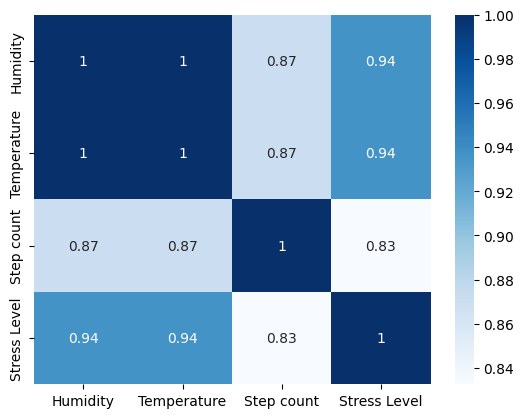

In [ ]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

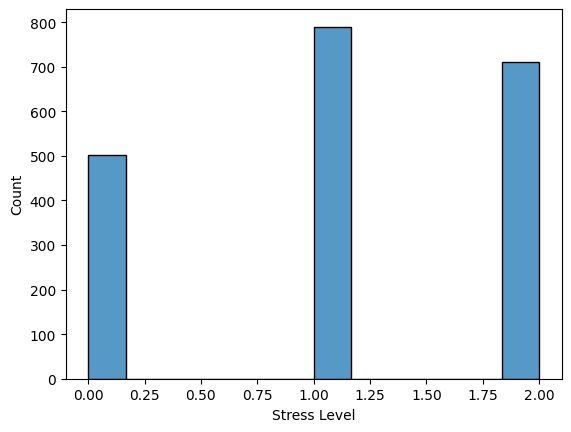

In [ ]:
sns.histplot(data=df,x='Stress Level')
plt.show()

<Figure size 700x700 with 0 Axes>

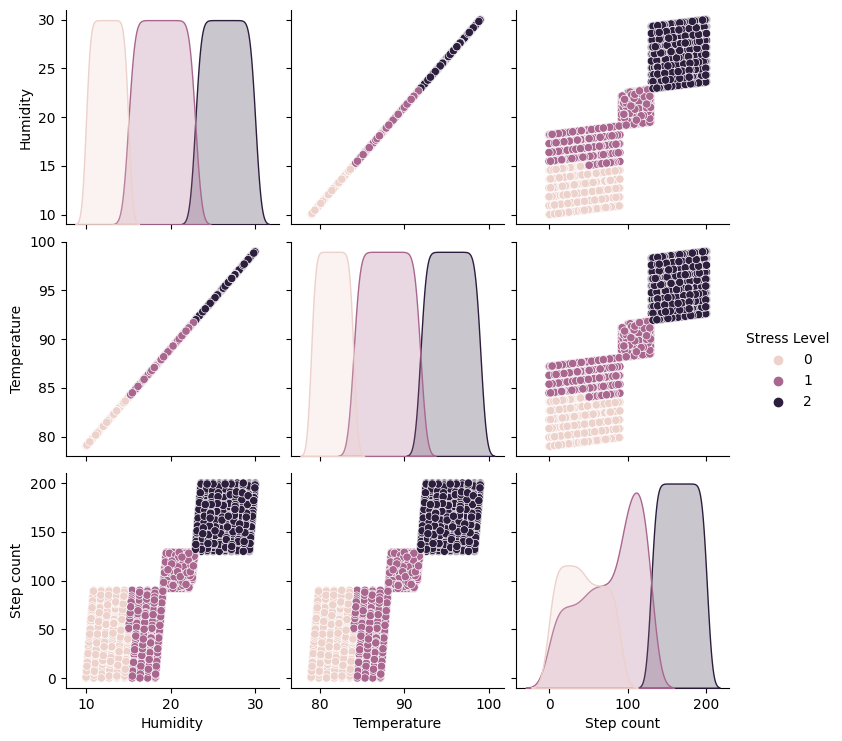

In [ ]:
plt.figure(figsize=(7,7))
sns.pairplot(df,hue='Stress Level')

Model Training

In [ ]:
from sklearn.model_selection import train_test_split
df_y = df['Stress Level']
df_x = df[df.columns[df.columns != 'Stress Level']]
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, random_state=42)

In [ ]:
test_x.head(5)

,Humidity,Temperature,Step count
1394,11.57,80.57,66
353,21.63,90.63,115
1334,16.12,85.12,66
906,15.32,84.32,77
1290,11.65,80.65,74


In [ ]:
test_y.head(5)

1394    0
353     1
1334    1
906     1
1290    0
Name: Stress Level, dtype: int64

In [ ]:
from sklearn import tree
# Build a learning model
model_dt = tree.DecisionTreeClassifier(max_depth=3, random_state=42)

# Set the test data for learning
model1 = model_dt.fit(train_x, train_y)

# Conduct inference
test_dt = model_dt.predict(test_x)

# Calculate the accuracy
score_dt = model_dt.score(test_x, test_y)
print(f'Accuracy is {score_dt * 100}%.')

Accuracy is 100.0%.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Build a leaening model
model_rf = RandomForestClassifier(max_depth=3, random_state=42)

# Set the test data for learning
model2=model_rf.fit(train_x, train_y)

# Conduct inference
test = model_rf.predict(test_x)

# Calculate the accuracy
score_rfc = accuracy_score(test_y, test)
print(f'Accuracy is {score_rfc * 100}%.')

Accuracy is 100.0%.


In [ ]:
import pickle

pickle.dump(model1, open('model1.pkl', 'wb'))
pickle.dump(model2, open('model2.pkl', 'wb'))

## **Run This Alone**

In [ ]:
import pickle
pickled_model = pickle.load(open('/content/stress.pkl', 'rb'))

In [ ]:
#input_data = (11.57,80.57,66)
import numpy as np
input_data = []
h = input("Enter humidity value:")
input_data.append(h)
t = input("Enter temperature value:")
input_data.append(t)
s = input("Enter step counts:")
input_data.append(s)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = pickled_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Hurray!')
  print('Your stress is normal')
elif (prediction[0] == 1) :
  print('Your stress is quite high')
  print('Sleep well')
  print('Suggested Exercises: 1. Surya namaskar 2.pranayama 3.Marjaryasana 4.Savasana')
else:
  print('Your stress is very high.')
  print('Try Relaxing Yourself')
  print('Take a break and enjoy this weekend and sleep well')
  print('Suggested Exercises: 1. Surya namaskar 2.pranayama 3.Marjaryasana 4.Savasana')

Enter humidity value:26
Enter temperature value:96
Enter step counts:196
[2]
Your stress is very high.
Try Relaxing Yourself
Take a break and enjoy this weekend and sleep well
Suggested Exercises: 1. Surya namaskar 2.pranayama 3.Marjaryasana 4.Savasana


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Ovulation prediction

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Prediction_data.csv")

In [ ]:
df.head()

,Person_id,IR,BPM,Status
0,1,96141,81,Non-ovulation
1,1,96168,81,Non-ovulation
2,1,96169,81,Non-ovulation
3,1,96181,81,Non-ovulation
4,1,96173,81,Non-ovulation


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Person_id  998 non-null    int64 
 1   IR         998 non-null    int64 
 2   BPM        998 non-null    int64 
 3   Status     998 non-null    object
dtypes: int64(3), object(1)
memory usage: 31.3+ KB


In [ ]:
df.isnull().sum()

Person_id    0
IR           0
BPM          0
Status       0
dtype: int64

In [ ]:
df.describe()

,Person_id,IR,BPM
count,998.0,998.000000,998.000000
mean,1.0,96735.336673,88.005010
std,0.0,605.126926,8.886613
min,1.0,96100.000000,72.000000
25%,1.0,96184.250000,80.000000
50%,1.0,96528.500000,92.000000
75%,1.0,97262.500000,96.000000
max,1.0,97998.000000,101.000000


In [ ]:
df.shape

(998, 4)

In [ ]:
(df['Status'].value_counts()/df.shape[0])*100

ovulation        50.1002
Non-ovulation    49.8998
Name: Status, dtype: float64

In [ ]:
df=df.drop('Person_id',axis='columns')

<Axes: >

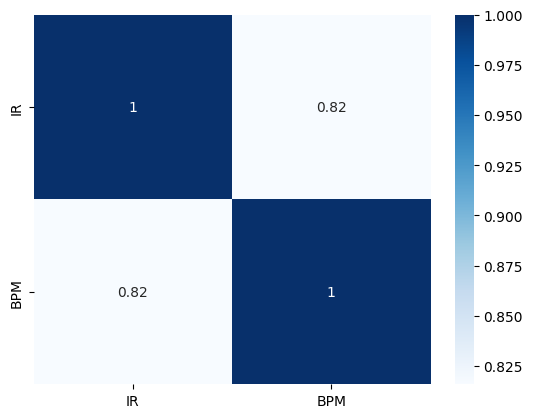

In [ ]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

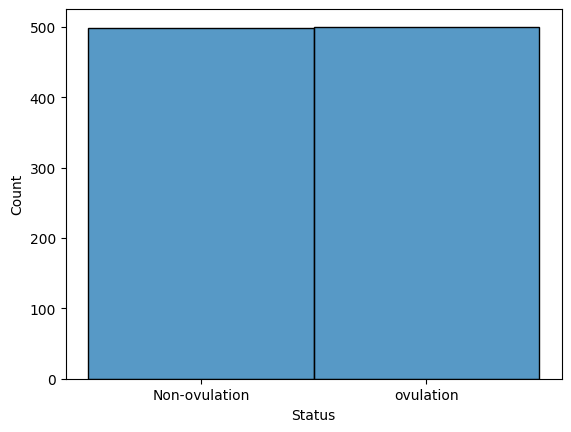

In [ ]:
sns.histplot(data=df,x='Status')
plt.show()

<Figure size 700x700 with 0 Axes>

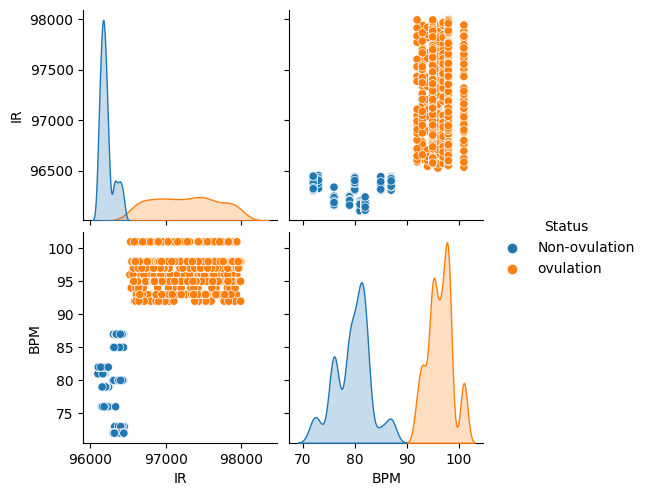

In [ ]:
plt.figure(figsize=(7,7))
sns.pairplot(df,hue='Status')

In [ ]:
from sklearn.model_selection import train_test_split
df_y = df['Status']
df_x = df[df.columns[df.columns != 'Status']]
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, random_state=42)

In [ ]:
test_x.head(5)

,IR,BPM
453,96392,87
792,97415,95
209,96160,79
309,96186,76
739,97047,93


In [ ]:
test_y.head(5)

453    Non-ovulation
792        ovulation
209    Non-ovulation
309    Non-ovulation
739        ovulation
Name: Status, dtype: object

In [ ]:
from sklearn import tree
# Build a learning model
model_dt = tree.DecisionTreeClassifier(max_depth=3, random_state=42)

# Set the test data for learning
model_ovulation = model_dt.fit(train_x, train_y)

# Conduct inference
test_dt = model_dt.predict(test_x)

# Calculate the accuracy
score_dt = model_dt.score(test_x, test_y)
print(f'Accuracy is {score_dt * 100}%.')

Accuracy is 100.0%.


In [ ]:
import pickle

pickle.dump(model_ovulation, open('model_ovulation.pkl', 'wb'))

### **Run This Alone**

In [ ]:
pickled_model = pickle.load(open('model_ovulation.pkl', 'rb'))

In [ ]:
input_data = []
h = input("Enter IR value:")
input_data.append(h)
t = input("Enter bpm value:")
input_data.append(t)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = pickled_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 'ovulation'):
  print("Ovulation occured")
else:
  print('No Ovulation has occured')

Enter IR value:96319
Enter bpm value:72
['Non-ovulation']
No Ovulation has occured


In [ ]:
input_data = []
h = input("Enter IR value:")
input_data.append(h)
t = input("Enter bpm value:")
input_data.append(t)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = pickled_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 'ovulation'):
  print("Ovulation has occured")
else:
  print('No Ovulation has occured')

Enter IR value:97376
Enter bpm value:95
['ovulation']
Ovulation occured


***Pad change reminder***

## **Run This Alone**

In [ ]:
from time import sleep
from pytz import timezone
from datetime import datetime

print("Type start:")
enter = input()
if(enter=="start"):
  ind_time = datetime.now(timezone("Asia/Kolkata")).strftime('%Y-%m-%d %H:%M:%S')
  print("You kept your pad on",ind_time)
  while(enter!="stop"):
    sleep(10)
    print("Time to change your pad")
    print("type stop to stop; if u have changed your pad type continue")
    enter = input()
    if enter=="stop":
      print("Hurray! good job")
    else:
      ind_time = datetime.now(timezone("Asia/Kolkata")).strftime('%Y-%m-%d %H:%M:%S')
      print("You changed your pad on",ind_time)


Type start:
start
You kept your pad on 2023-10-22 14:57:30
Time to change your pad
type stop to stop; if u have changed your pad type continue
continue
You changed your pad on 2023-10-22 14:57:50
Time to change your pad
type stop to stop; if u have changed your pad type continue
stop
Hurray! good job


***PCOS DETECTION I/P IMG***

In [ ]:
import pandas as pd
import pickle
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv("/content/PCOS_infertility.csv")
df = df.fillna(0)

In [ ]:
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'],
      dtype='object')

In [ ]:
df.head(5)

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [ ]:
!git clone https://github.com/GaneshkumarKarunanidhi/PCOS-Detection.git

Cloning into 'PCOS-Detection'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 11 (delta 1), reused 6 (delta 0), pack-reused 3
Receiving objects: 100% (11/11), 63.25 MiB | 44.09 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
%cd PCOS-Detection/

/content/PCOS-Detection


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
import zipfile

In [ ]:
!unzip PCOS.zip

Archive:  PCOS.zip
   creating: PCOS/infected/
  inflating: PCOS/infected/img_0_1023.jpg  
  inflating: PCOS/infected/img_0_1033.jpg  
  inflating: PCOS/infected/img_0_1071.jpg  
  inflating: PCOS/infected/img_0_1075.jpg  
  inflating: PCOS/infected/img_0_1079.jpg  
  inflating: PCOS/infected/img_0_1083.jpg  
  inflating: PCOS/infected/img_0_1087.jpg  
  inflating: PCOS/infected/img_0_1088.jpg  
  inflating: PCOS/infected/img_0_1099.jpg  
  inflating: PCOS/infected/img_0_113.jpg  
  inflating: PCOS/infected/img_0_1130.jpg  
  inflating: PCOS/infected/img_0_1141.jpg  
  inflating: PCOS/infected/img_0_1142.jpg  
  inflating: PCOS/infected/img_0_1182.jpg  
  inflating: PCOS/infected/img_0_1195.jpg  
  inflating: PCOS/infected/img_0_1223.jpg  
  inflating: PCOS/infected/img_0_1226.jpg  
  inflating: PCOS/infected/img_0_1234.jpg  
  inflating: PCOS/infected/img_0_1257.jpg  
  inflating: PCOS/infected/img_0_126.jpg  
  inflating: PCOS/infected/img_0_1260.jpg  
  inflating: PCOS/infected/img_

In [ ]:
ROOT_DIR = '/content/PCOS-Detection/PCOS'
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
   number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))
   print("",dir,"" ,number_of_images[dir])

 infected  781
 notinfected  1143


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input

In [ ]:
def preprocessingImage1(path):
  image_data = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,preprocessing_function= preprocess_input,horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [ ]:
def preprocessionfImage2(path):
  """
  Input :path
  Output : preprocessed Image
  """
  image_data  = ImageDataGenerator(preprocessing_function= preprocess_input )
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')

  return image

In [ ]:
def datafolder(path,split):
  if not os.path.exists("./"+path):
    os.mkdir("./"+path)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+path+"/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                                  size=(math.floor(split * number_of_images[dir])-5),replace=False):

          O = os.path.join(ROOT_DIR,dir,img)
          D = os.path.join("./"+path,dir)
          shutil.copy(O,D)
          os.remove(O)

  else:
     print("Folder already exist")

In [ ]:
datafolder("train1",0.7)

In [ ]:
datafolder("val1",0.15)

In [ ]:
datafolder("test",0.15)

In [ ]:
path ='train1'
train_data = preprocessingImage1(path)

Found 1336 images belonging to 2 classes.


In [ ]:
path ='test'
test_data = preprocessionfImage2(path)

Found 278 images belonging to 2 classes.


In [ ]:
path ='val1'
val_data = preprocessionfImage2(path)

Found 278 images belonging to 2 classes.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten,Dense
from keras.models import Model,load_model
from keras.applications.mobilenet import MobileNet
import keras

In [ ]:
base_model = MobileNet(input_shape=(224,224,3),include_top=False)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
x= Flatten()(base_model.output)
x= Dense(units=1,activation='sigmoid')(x)

In [ ]:
model = Model(base_model.input,x)

In [ ]:
model.compile(optimizer='rmsprop',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

mc = ModelCheckpoint(filepath="bestmodel.h5",monitor='val_accuracy',verbose=1,save_best_only=True)

#Early check points
es = EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=5,verbose=1)

cb = [mc,es]

In [ ]:
hist = model.fit_generator(train_data,
                           steps_per_epoch=10,
                           epochs=30,
                           validation_data=val_data,
                           validation_steps=16,
                          callbacks=cb)

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 1.6319 - accuracy: 0.8687


Epoch 1: val_accuracy improved from -inf to 0.98201, saving model to bestmodel.h5


You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


10/10 [==============================] - 38s 4s/step - loss: 1.6319 - accuracy: 0.8687 - val_loss: 0.1217 - val_accuracy: 0.9820
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.0010 - accuracy: 1.0000

10/10 [==============================] - 24s 2s/step - loss: 0.0010 - accuracy: 1.0000
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 0.9968    

10/10 [==============================] - 18s 2s/step - loss: 0.0064 - accuracy: 0.9968
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.0181 - accuracy: 0.9969

10/10 [==============================] - 18s 2s/step - loss: 0.0181 - accuracy: 0.9969
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 2.9566e-05 - accuracy: 1.0000

10/10 [==============================] - 19s 2s/step - loss: 2.9566e-05 - accuracy: 1.0000
Epoch 6/30
10/10 [==============================] - ETA: 0s - loss: 4.7296e-05 - accuracy: 1.0000

10/10 [==============================] - 21s 2s/step - loss: 4.7296e-05 - accuracy: 1.0000
Epoch 7/30
10/10 [==============================] - ETA: 0s - loss: 1.1613e-05 - accuracy: 1.0000

10/10 [==============================] - 20s 2s/step - loss: 1.1613e-05 - accuracy: 1.0000
Epoch 8/30
10/10 [==============================] - ETA: 0s - loss: 7.0957e-06 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 7.0957e-06 - accuracy: 1.0000
Epoch 9/30
10/10 [==============================] - ETA: 0s - loss: 3.5501e-07 - accuracy: 1.0000

10/10 [==============================] - 22s 2s/step - loss: 3.5501e-07 - accuracy: 1.0000
Epoch 10/30
10/10 [==============================] - ETA: 0s - loss: 8.6458e-07 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 8.6458e-07 - accuracy: 1.0000
Epoch 11/30
10/10 [==============================] - ETA: 0s - loss: 1.5201 - accuracy: 0.8969

10/10 [==============================] - 24s 2s/step - loss: 1.5201 - accuracy: 0.8969
Epoch 12/30
10/10 [==============================] - ETA: 0s - loss: 1.0209e-06 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 1.0209e-06 - accuracy: 1.0000
Epoch 13/30
10/10 [==============================] - ETA: 0s - loss: 5.1398e-06 - accuracy: 1.0000

10/10 [==============================] - 19s 2s/step - loss: 5.1398e-06 - accuracy: 1.0000
Epoch 14/30
10/10 [==============================] - ETA: 0s - loss: 1.4722e-05 - accuracy: 1.0000

10/10 [==============================] - 17s 2s/step - loss: 1.4722e-05 - accuracy: 1.0000
Epoch 15/30
10/10 [==============================] - ETA: 0s - loss: 1.6144e-06 - accuracy: 1.0000

10/10 [==============================] - 23s 2s/step - loss: 1.6144e-06 - accuracy: 1.0000
Epoch 16/30
10/10 [==============================] - ETA: 0s - loss: 2.8005e-06 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 2.8005e-06 - accuracy: 1.0000
Epoch 17/30
10/10 [==============================] - ETA: 0s - loss: 1.3264e-06 - accuracy: 1.0000

10/10 [==============================] - 26s 2s/step - loss: 1.3264e-06 - accuracy: 1.0000
Epoch 18/30
10/10 [==============================] - ETA: 0s - loss: 4.0546e-06 - accuracy: 1.0000

10/10 [==============================] - 20s 2s/step - loss: 4.0546e-06 - accuracy: 1.0000
Epoch 19/30
10/10 [==============================] - ETA: 0s - loss: 6.5115e-06 - accuracy: 1.0000

10/10 [==============================] - 27s 3s/step - loss: 6.5115e-06 - accuracy: 1.0000
Epoch 20/30
10/10 [==============================] - ETA: 0s - loss: 4.4288e-06 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 4.4288e-06 - accuracy: 1.0000
Epoch 21/30
10/10 [==============================] - ETA: 0s - loss: 4.2889e-07 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 4.2889e-07 - accuracy: 1.0000
Epoch 22/30
10/10 [==============================] - ETA: 0s - loss: 6.9239e-07 - accuracy: 1.0000

10/10 [==============================] - 23s 2s/step - loss: 6.9239e-07 - accuracy: 1.0000
Epoch 23/30
10/10 [==============================] - ETA: 0s - loss: 5.0951e-08 - accuracy: 1.0000

10/10 [==============================] - 21s 2s/step - loss: 5.0951e-08 - accuracy: 1.0000
Epoch 24/30
10/10 [==============================] - ETA: 0s - loss: 5.9294e-06 - accuracy: 1.0000

10/10 [==============================] - 23s 2s/step - loss: 5.9294e-06 - accuracy: 1.0000
Epoch 25/30
10/10 [==============================] - ETA: 0s - loss: 3.8317e-08 - accuracy: 1.0000

10/10 [==============================] - 23s 2s/step - loss: 3.8317e-08 - accuracy: 1.0000
Epoch 26/30
10/10 [==============================] - ETA: 0s - loss: 1.1393e-08 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 1.1393e-08 - accuracy: 1.0000
Epoch 27/30
10/10 [==============================] - ETA: 0s - loss: 1.7779e-08 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 1.7779e-08 - accuracy: 1.0000
Epoch 28/30
10/10 [==============================] - ETA: 0s - loss: 5.8296e-08 - accuracy: 1.0000

10/10 [==============================] - 17s 2s/step - loss: 5.8296e-08 - accuracy: 1.0000
Epoch 29/30
10/10 [==============================] - ETA: 0s - loss: 4.2636e-10 - accuracy: 1.0000

10/10 [==============================] - 19s 2s/step - loss: 4.2636e-10 - accuracy: 1.0000
Epoch 30/30
10/10 [==============================] - ETA: 0s - loss: 3.2304e-09 - accuracy: 1.0000

10/10 [==============================] - 18s 2s/step - loss: 3.2304e-09 - accuracy: 1.0000


## **Run This Alone**

In [ ]:
model = load_model("/content/pcos.h5")

In [ ]:
acc = model.evaluate_generator(test_data)[1]
print(f"our model accuracy is  {acc * 100} %")

`Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.


our model accuracy is  98.20144176483154 %


In [ ]:
from keras.preprocessing import image
import tensorflow as tf


def predictimage(path):

      img = tf.keras.utils.load_img(path,target_size=(224,224))
      i = tf.keras.utils.img_to_array(img)/255
      input_arr= np.array([i])
      input_arr.shape

      pred =model.predict(input_arr)
      if pred == 1:
          print("Not Affected")
      else :
         print("Affected")
      #display image
      plt.imshow(input_arr[0],vmin=0, vmax=255)
      plt.title("input Image")
      plt.show()

1/1 [==============================] - 1s 1s/step
Affected


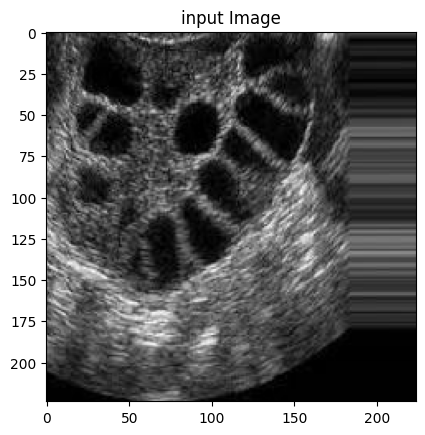

In [ ]:
predictimage("/content/PCOS-Detection/PCOS/infected/img_0_1083.jpg")

1/1 [==============================] - 0s 59ms/step
Not Affected


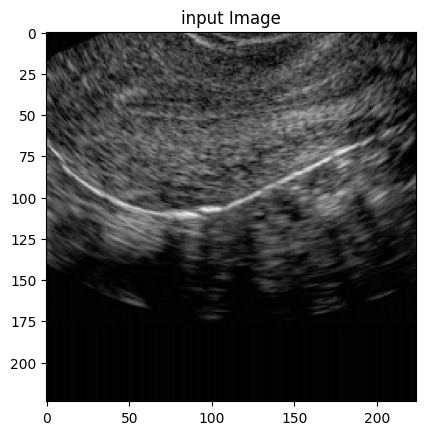

In [ ]:
predictimage("/content/PCOS-Detection/PCOS/notinfected/img_0_3023.jpg")

cyst number

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/107.7 GB disk)

OS                  Linux-5.15.120+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.68 GB
CPU                 Intel Xeon 2.20GHz
CUDA                None

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.23.5>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.3>=1.4.1
torch               ✅ 2.1.0+cu118>=1.8.0
torchvision         ✅ 0.16.0+cu118>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


In [ ]:
import os
Home = os.getcwd()
print(Home)

/content


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2EcC68WFpAvsFTGtC53w")
project = rf.workspace("miruprojects").project("cyst_identification")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstall

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.200, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to cyst_identification-1 in yolov8:: 100%|██████████| 314/314 [00:00<00:00, 6218.48it/s]


In [ ]:
import os
Home = os.getcwd()
print(Home)

/content


In [ ]:
%cd {Home}
#!yolo task = detect mode=train model=yolov8n.pt data=content/cyst_identification-1/data.yaml epochs=15 imgsz=640
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=50 imgsz=900

/content
Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/cyst_identification-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=900, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscri

In [ ]:
!ls {Home}/runs/detect/train6/

args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch320.jpg
confusion_matrix.png				    R_curve.png       train_batch321.jpg
events.out.tfevents.1697885881.4918aecdd335.4661.0  results.csv       train_batch322.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


/content


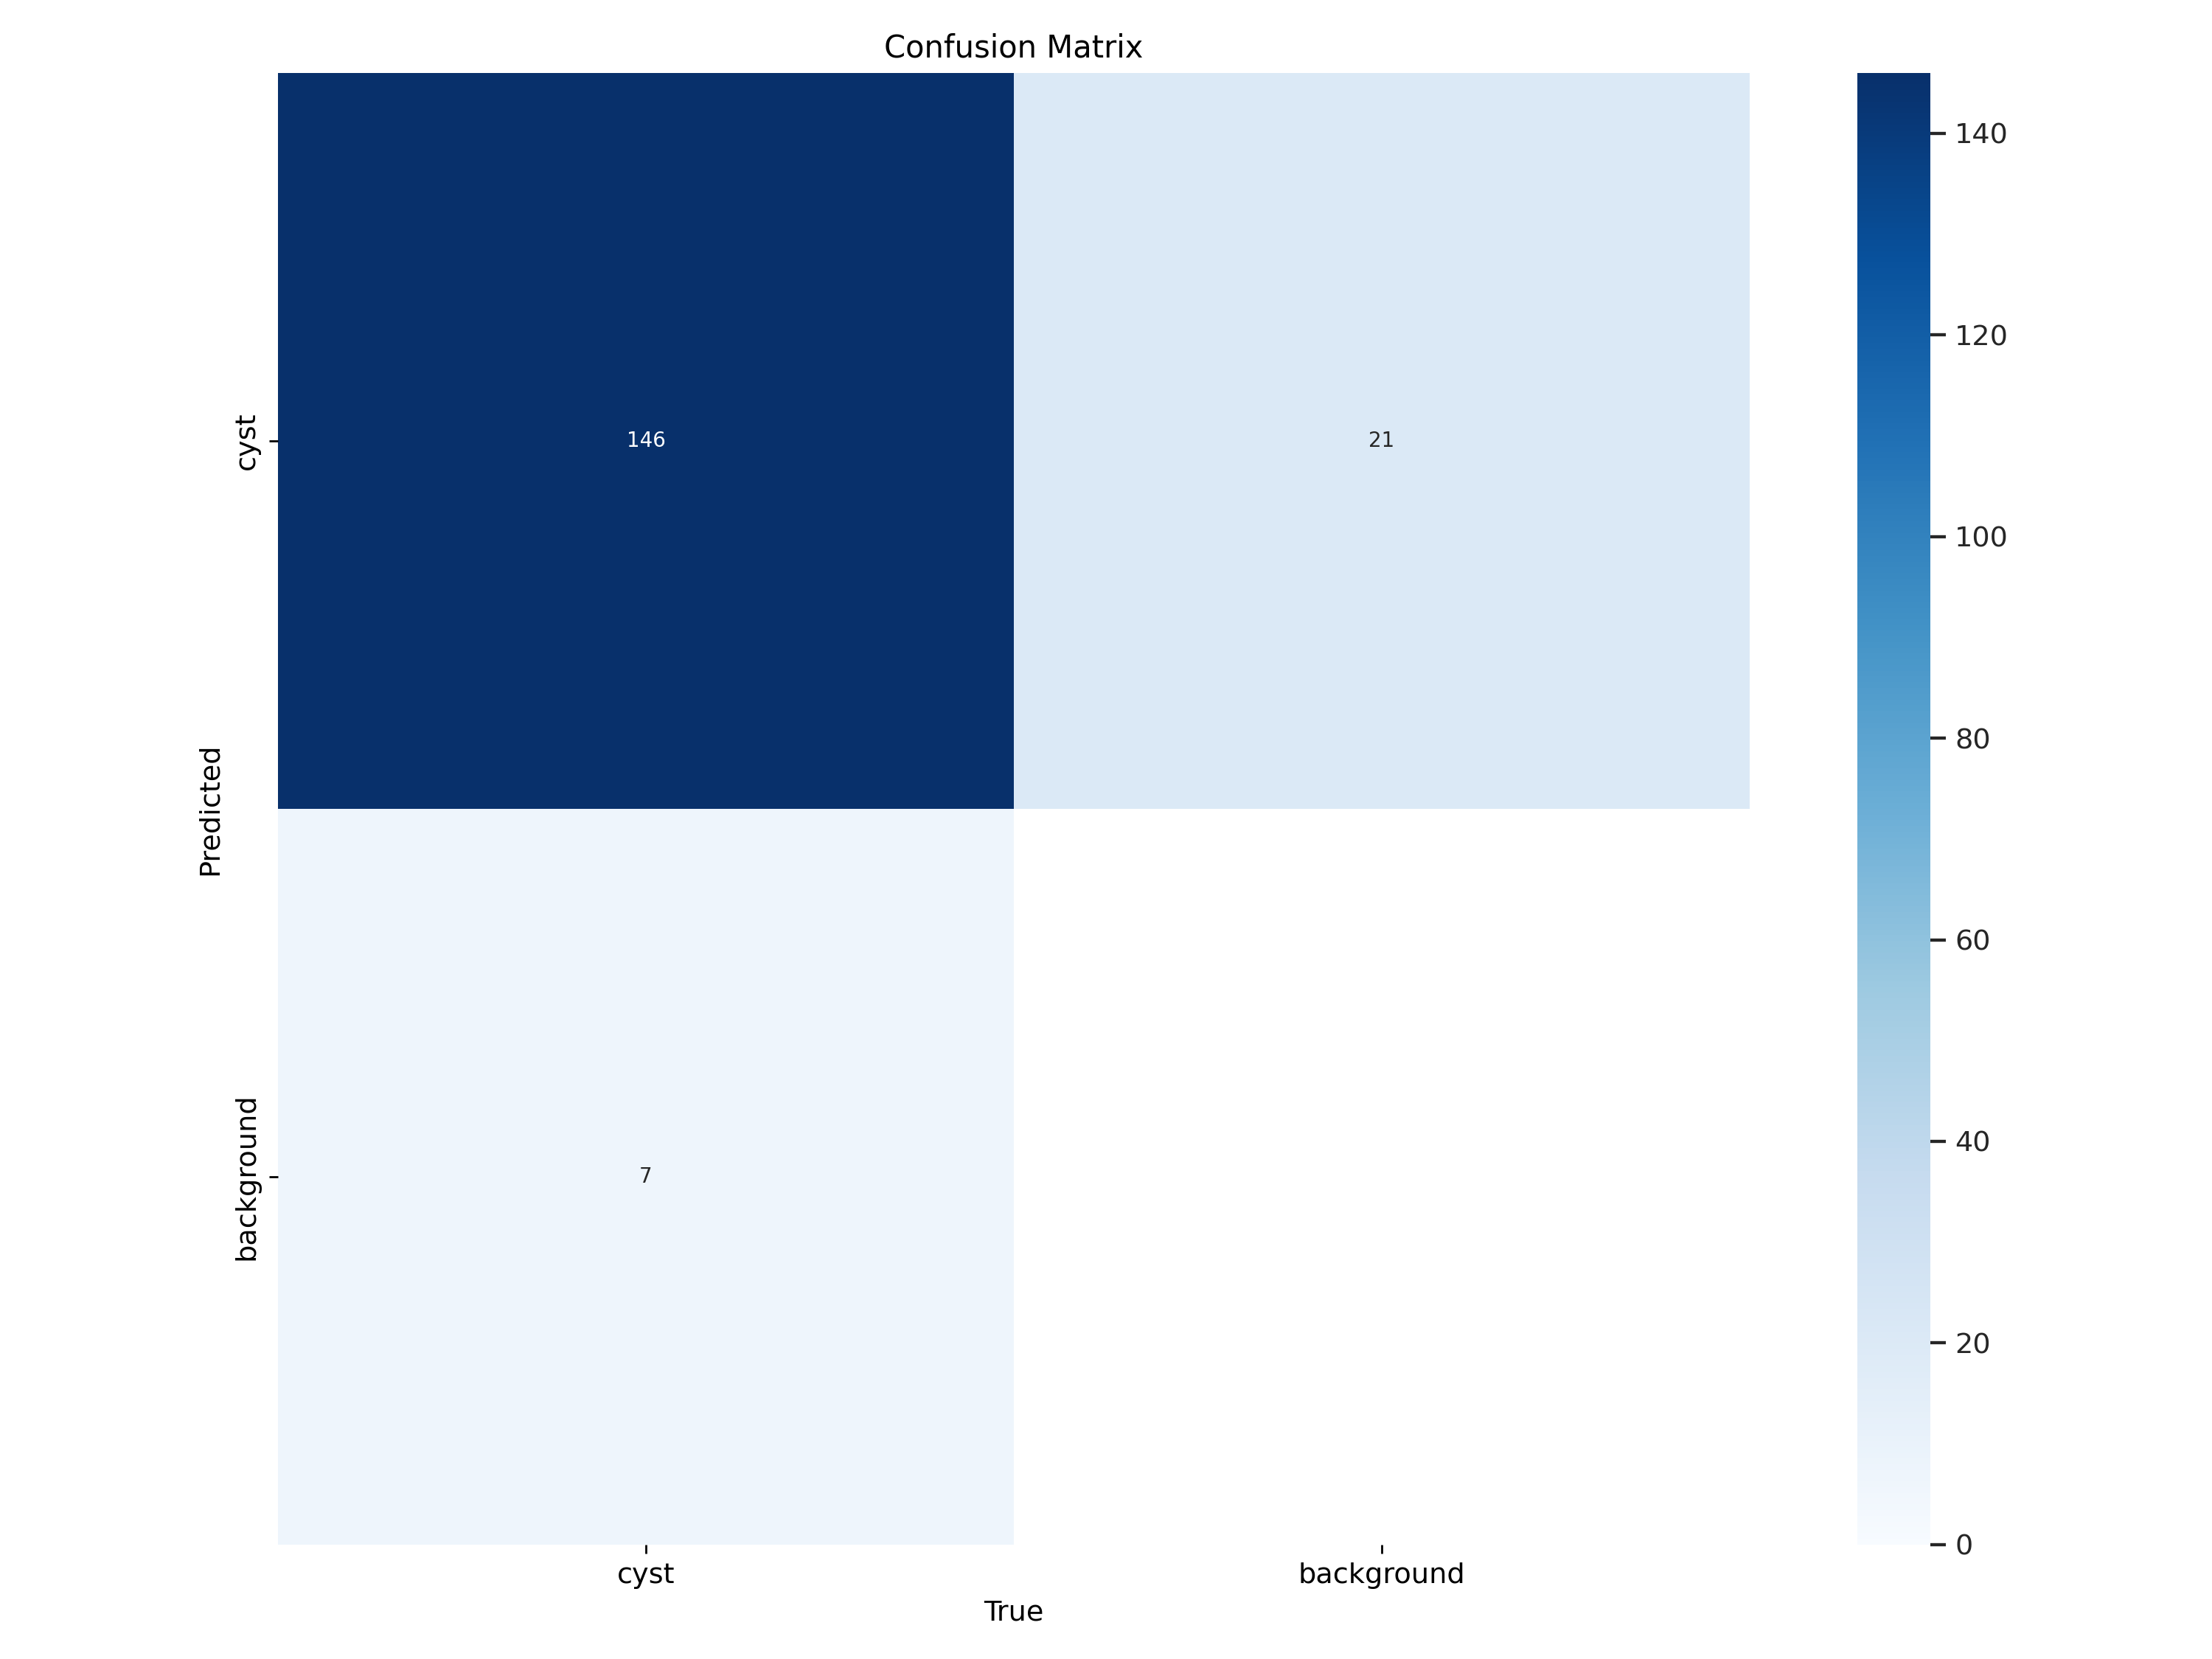

In [ ]:
%cd {Home}
Image(filename=f'{Home}/runs/detect/train6/confusion_matrix.png', width=600)

/content


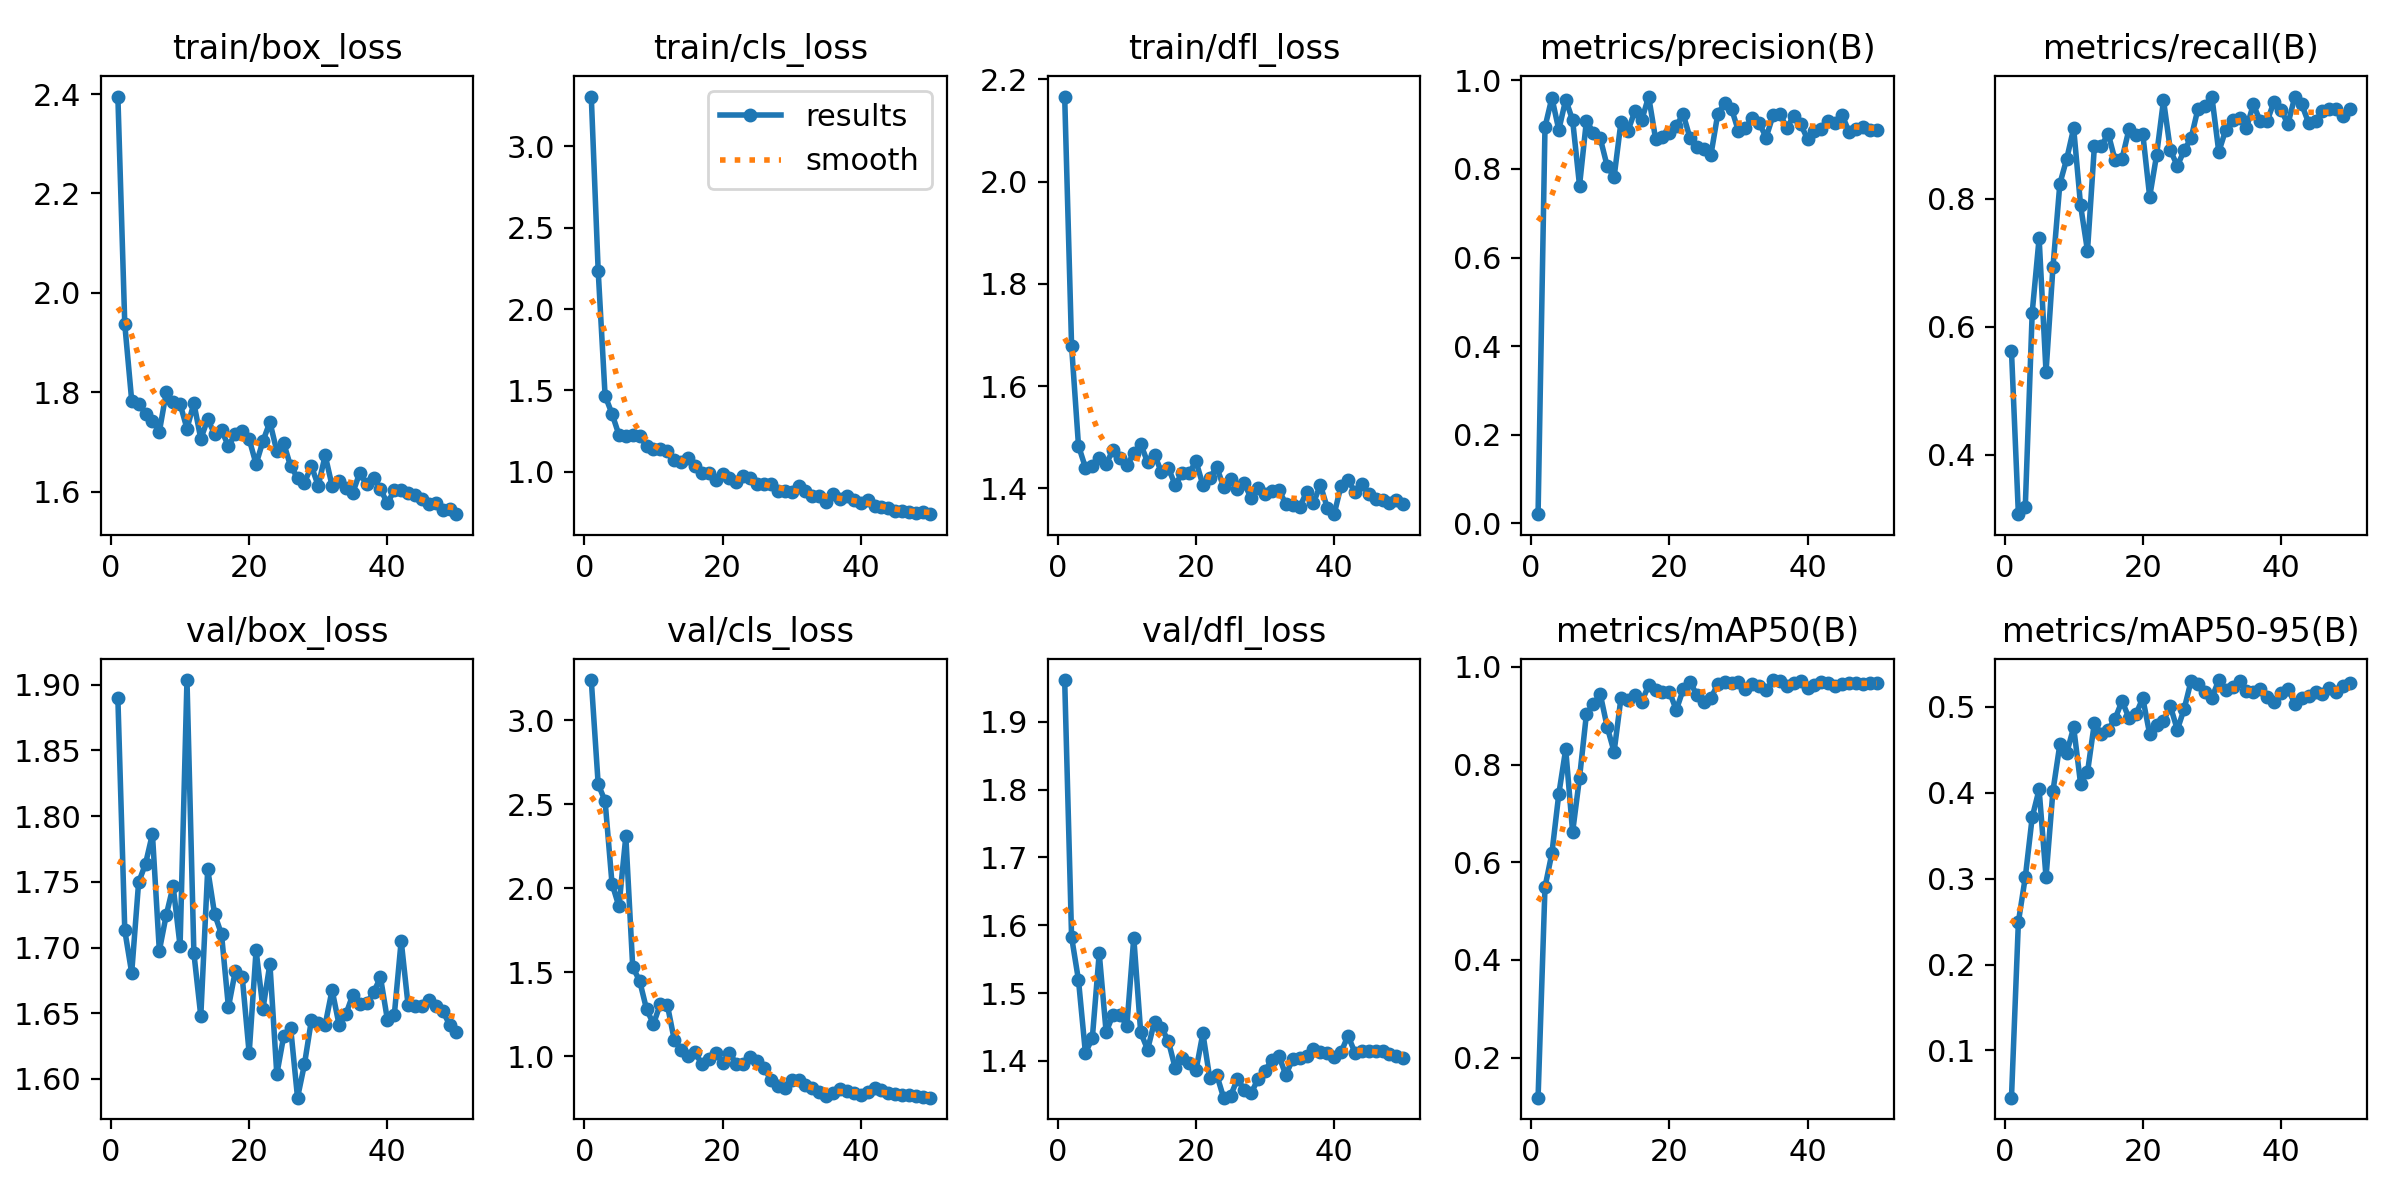

In [ ]:
%cd {Home}
Image(filename=f'{Home}/runs/detect/train6/results.png', width=600)

In [ ]:
%cd {Home}
!yolo task=detect mode=predict model={Home}/runs/detect/train6/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/9 /content/cyst_identification-1/test/images/img4_jpg.rf.e85eacf00416cc6176454cc42ccd164a.jpg: 928x928 15 cysts, 510.7ms
image 2/9 /content/cyst_identification-1/test/images/img_0_8160_jpg.rf.ff47e436f213a64e280a03e63e7cd923.jpg: 928x928 6 cysts, 443.7ms
image 3/9 /content/cyst_identification-1/test/images/img_0_8299_jpg.rf.2a8c392ae43784db075bb1aa0a5021c1.jpg: 928x928 16 cysts, 429.1ms
image 4/9 /content/cyst_identification-1/test/images/img_0_9446_jpg.rf.eaf5599635d678c96649083d050284fe.jpg: 928x928 6 cysts, 435.6ms
image 5/9 /content/cyst_identification-1/test/images/img_0_9474_jpg.rf.3fdfd26490153218f46094dffbeca9c3.jpg: 928x928 16 cysts, 420.8ms
image 6/9 /content/cyst_identification-1/test/images/img_0_9591_jpg.rf.893f12efb22997f079dbba0d8dfd1e78.jpg: 928x928 9 cysts, 446.1ms
image 7/9 /content/cyst_i

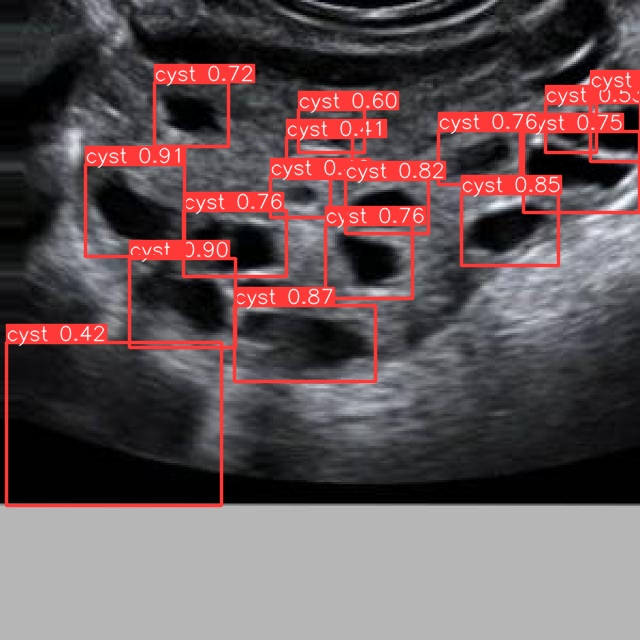

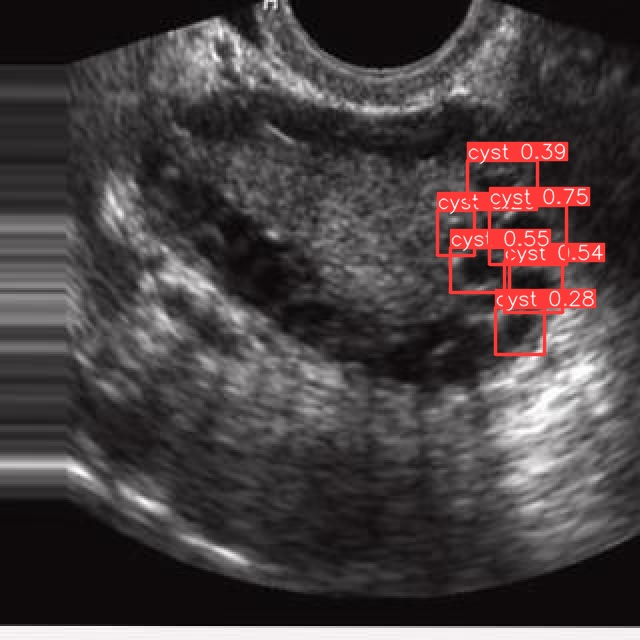

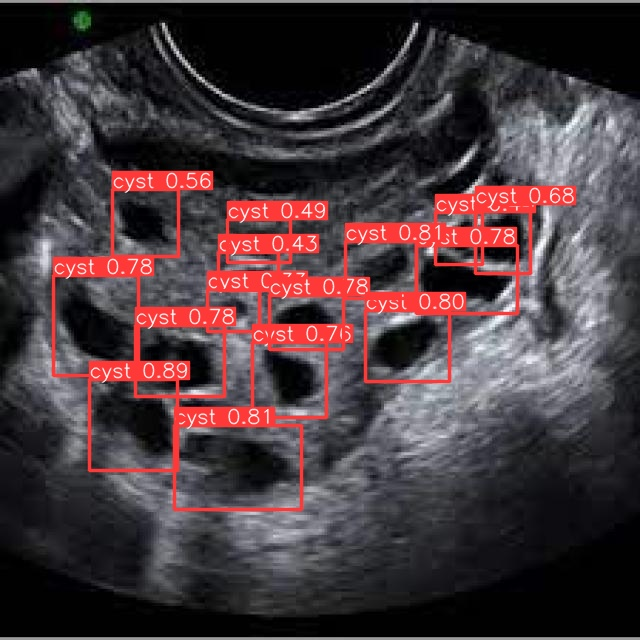

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{Home}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

## **Run This Alone**



In [ ]:
from ultralytics import YOLO
from PIL import Image
import cv2

model = YOLO("/content/cyst.pt")

# from PIL
im1 = Image.open("/content/img_0_9998.jpg")
results = model.predict(source=im1, save=True)  # save plotted images


0: 928x928 4 cysts, 1395.0ms
Speed: 60.7ms preprocess, 1395.0ms inference, 38.0ms postprocess per image at shape (1, 3, 928, 928)
Results saved to runs/detect/predict


***Complete model***

In [ ]:
from keras.models import Model,load_model
import numpy as np
import matplotlib.pyplot as plt

model = load_model("/content/pcos.h5")

!pip install ultralytics

from keras.preprocessing import image
import tensorflow as tf
from ultralytics import YOLO
from PIL import Image
import cv2
import time


def predictimage(path):
      img = tf.keras.utils.load_img(path,target_size=(224,224))
      i = tf.keras.utils.img_to_array(img)/255
      input_arr= np.array([i])
      input_arr.shape

      pred =model.predict(input_arr)
      if pred == 1:
          print("You do not have any cyst present. Thereby no PCOS")
          plt.imshow(input_arr[0],vmin=0, vmax=255)
          plt.title("input Image")
          plt.show()
      else :
         model1 = YOLO("/content/cyst.pt")
         print("You have PCOS")
         results = model1.predict(img,save=True)
         print("You can reduce your weight loss and improve your reproductive health with exercises.")
         suggest = input()
         l = ['Walking','2. Cardio','3. Strength training','4. Yoga','5. Core Strength','6.HIIT']
         while(suggest!="stop"):
            if suggest=="suggest":
              for i in l:
                print("Exercises to be done today (20 mins minimum)")
                print(i)
                time.sleep(10)
              suggest = input()

In [ ]:
predictimage("/content/infected4.jpg")

1/1 [==============================] - 1s 523ms/step
You have PCOS



0: 928x928 15 cysts, 558.2ms
Speed: 7.5ms preprocess, 558.2ms inference, 1.3ms postprocess per image at shape (1, 3, 928, 928)
Results saved to runs/detect/predict5


You can reduce your weight loss and improve your reproductive health with exercises.
suggest
Exercises to be done today (20 mins minimum)
Walking
Exercises to be done today (20 mins minimum)
2. Cardio
Exercises to be done today (20 mins minimum)
3. Strength training
Exercises to be done today (20 mins minimum)
4. Yoga
Exercises to be done today (20 mins minimum)
5. Core Strength
Exercises to be done today (20 mins minimum)
6.HIIT
stop


***Menstrual data collection from user***

In [ ]:
from time import sleep
from pytz import timezone
from datetime import datetime,timedelta
from datetime import date

enter = input("Type 'log' to log your period date ")
if(enter=="log"):
  ind_time = datetime.now(timezone("Asia/Kolkata")).strftime('%Y-%m-%d')

date_entry = input('Enter period end date in YYYY-MM-DD format ')
year, month, day = map(int, date_entry.split('-'))
date1 = date(year, month, day)
print("You got your period on",ind_time)
print("your period gets over on",date1)

print("you ovulate from",(datetime.now(timezone("Asia/Kolkata")) - timedelta(days=14)).strftime('%Y-%m-%d'),"to",(datetime.now(timezone("Asia/Kolkata")) - timedelta(days=12)).strftime('%Y-%m-%d'))
print("Fertile window period from",(datetime.now(timezone("Asia/Kolkata")) - timedelta(days=19)).strftime('%Y-%m-%d'),"to",(datetime.now(timezone("Asia/Kolkata")) - timedelta(days=11)).strftime('%Y-%m-%d'))

Type 'log' to log your period date log
Enter a date in YYYY-MM-DD format 2023-10-28
You got your period on 2023-10-22
your period gets over on 2023-10-28
you ovulate from 2023-10-08 to 2023-10-10
Fertile window period from 2023-10-03 to 2023-10-11


In [ ]:
from time import sleep
from pytz import timezone
from datetime import datetime,timedelta
from datetime import date

date_list = []
date_list1 = []
date_list2 = []

#Period
enter = input("Type 'log' to log your period date ")
if(enter=="log"):
  ind_date = date.today()
date_entry = input('Enter period end date in YYYY-MM-DD format ')
year, month, day = map(int, date_entry.split('-'))
date1 = date(year, month, day)

#Period date
while ind_date <= date1:
    date_list2.append(ind_date.strftime('%Y-%m-%d'))
    ind_date = ind_date+timedelta(days=1)

#Next Ovulation
ovu_date1 = (datetime.now(timezone("Asia/Kolkata")) + timedelta(days=14)).strftime('%Y-%m-%d')
ovu_date2 = (  datetime.now(timezone("Asia/Kolkata")) + timedelta(days=20)).strftime('%Y-%m-%d')

# Ovulation and fertile window
start_date=datetime.now(timezone("Asia/Kolkata")) - timedelta(days=19)
end_date =datetime.now(timezone("Asia/Kolkata")) - timedelta(days=15)

# Fertile window
while start_date <= end_date:
    date_list.append(start_date.strftime('%Y-%m-%d'))
    start_date = (start_date+timedelta(days=1))
start_date1 = start_date+timedelta(days=3)
date_list.append(start_date1.strftime('%Y-%m-%d'))

# Ovulation
while start_date < start_date1:
    date_list1.append(start_date.strftime('%Y-%m-%d'))
    start_date = (start_date+timedelta(days=1))

# Print the list of dates
print('Previous fertile-window',date_list)
print('Previous Ovulation',date_list1)
print('Period dates',date_list2)
print("Next Ovulation date from",ovu_date1,"to",ovu_date2)

Type 'log' to log your period date log
Enter period end date in YYYY-MM-DD format 2023-10-28
Previous fertile-window ['2023-10-03', '2023-10-04', '2023-10-05', '2023-10-06', '2023-10-07', '2023-10-11']
Previous Ovulation ['2023-10-08', '2023-10-09', '2023-10-10']
Period dates ['2023-10-22', '2023-10-23', '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27', '2023-10-28']
Next Ovulation date from 2023-11-05 to 2023-11-11


***User Log based dataset***

In [ ]:
#user log code

import pandas as pd

from time import sleep
from pytz import timezone
from datetime import datetime,timedelta
from datetime import date

date_list = []
date_list1 = []
date_list2 = []

#Period
enter = input("Type 'log' to log your period date ")
if(enter=="log"):
  ind_date = date.today()
date_entry = input('Enter period end date in YYYY-MM-DD format ')
year, month, day = map(int, date_entry.split('-'))
date1 = date(year, month, day)

#Period date
while ind_date <= date1:
    date_list2.append(ind_date.strftime('%Y-%m-%d'))
    ind_date = ind_date+timedelta(days=1)

#Next Ovulation
ovu_date1 = (datetime.now(timezone("Asia/Kolkata")) + timedelta(days=14)).strftime('%Y-%m-%d')
ovu_date2 = (datetime.now(timezone("Asia/Kolkata")) + timedelta(days=20)).strftime('%Y-%m-%d')

# Ovulation and fertile window
start_date=datetime.now(timezone("Asia/Kolkata")) - timedelta(days=19)
end_date =datetime.now(timezone("Asia/Kolkata")) - timedelta(days=15)

# Fertile window
while start_date <= end_date:
    date_list.append(start_date.strftime('%Y-%m-%d'))
    start_date = (start_date+timedelta(days=1))
start_date1 = start_date+timedelta(days=3)
date_list.append(start_date1.strftime('%Y-%m-%d'))

# Ovulation
while start_date < start_date1:
    date_list1.append(start_date.strftime('%Y-%m-%d'))
    start_date = (start_date+timedelta(days=1))

begin_date = (datetime.now(timezone("Asia/Kolkata")) - timedelta(days=20)).strftime('%Y-%m-%d')
state=[]
df = pd.DataFrame({'date': pd.date_range(begin_date, periods=30).strftime('%Y-%m-%d')})
df.head()
for i in df['date']:
  if i in date_list:
    state.append("fertile-window")
  elif i in date_list1:
    state.append("Ovulation")
  elif i in date_list2:
    state.append("Period")
  else:
    state.append("normal")
df['state']=state

# print(date_list)
# print(date_list1)
# print(date_list2)

df.head(30)

# print("You ovulate from",(datetime.now(timezone("Asia/Kolkata")) - timedelta(days=14)).strftime('%Y-%m-%d'),"to",(datetime.now(timezone("Asia/Kolkata")) - timedelta(days=12)).strftime('%Y-%m-%d'))
# print("Fertile window period from",(datetime.now(timezone("Asia/Kolkata")) - timedelta(days=19)).strftime('%Y-%m-%d'),"to",(datetime.now(timezone("Asia/Kolkata")) - timedelta(days=11)).strftime('%Y-%m-%d'))
# print("You might get you next period from",((datetime.now(timezone("Asia/Kolkata")) + timedelta(days=12))+timedelta(days=14)).strftime('%Y-%m-%d'),"to",((datetime.now(timezone("Asia/Kolkata")) + timedelta(days=14))+timedelta(days=14)).strftime('%Y-%m-%d'))

Type 'log' to log your period date log
Enter period end date in YYYY-MM-DD format 2023-11-20


,date,state
0,2023-10-25,normal
1,2023-10-26,fertile-window
2,2023-10-27,fertile-window
3,2023-10-28,fertile-window
4,2023-10-29,fertile-window
5,2023-10-30,fertile-window
6,2023-10-31,Ovulation
7,2023-11-01,Ovulation
8,2023-11-02,Ovulation
9,2023-11-03,fertile-window
